## Intro

In [2]:
import fastbook
fastbook.setup_book()

In [3]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Grays')

This note book works on the MNIST dataset. Using deep learning to identify between 3 and 7s.

First download the dataset.

In [4]:
URLs.MNIST_SAMPLE

'https://s3.amazonaws.com/fast-ai-sample/mnist_sample.tgz'

In [5]:
path = Path('../datasets/mnist_sample')
path.ls()

(#3) [Path('../datasets/mnist_sample/valid'),Path('../datasets/mnist_sample/train'),Path('../datasets/mnist_sample/labels.csv')]

In [6]:
(path/'train').ls()

(#2) [Path('../datasets/mnist_sample/train/3'),Path('../datasets/mnist_sample/train/7')]

In [7]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('../datasets/mnist_sample/train/3/10.png'),Path('../datasets/mnist_sample/train/3/10000.png'),Path('../datasets/mnist_sample/train/3/10011.png'),Path('../datasets/mnist_sample/train/3/10031.png'),Path('../datasets/mnist_sample/train/3/10034.png'),Path('../datasets/mnist_sample/train/3/10042.png'),Path('../datasets/mnist_sample/train/3/10052.png'),Path('../datasets/mnist_sample/train/3/1007.png'),Path('../datasets/mnist_sample/train/3/10074.png'),Path('../datasets/mnist_sample/train/3/10091.png'),Path('../datasets/mnist_sample/train/3/10093.png'),Path('../datasets/mnist_sample/train/3/10097.png'),Path('../datasets/mnist_sample/train/3/10099.png'),Path('../datasets/mnist_sample/train/3/10116.png'),Path('../datasets/mnist_sample/train/3/10125.png'),Path('../datasets/mnist_sample/train/3/10137.png'),Path('../datasets/mnist_sample/train/3/10141.png'),Path('../datasets/mnist_sample/train/3/10144.png'),Path('../datasets/mnist_sample/train/3/10155.png'),Path('../datasets/mnist_sa

In [8]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [9]:
array(im3)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0

In [10]:
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Blues')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## Pixel Similarity Approach

In [12]:
seven_tensors = [tensor(Image.open(p)) for p in sevens]
three_tensors = [tensor(Image.open(p)) for p in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

<Axes: >

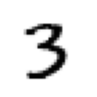

In [13]:
show_image(three_tensors[1])

In [14]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens.shape

torch.Size([6265, 28, 28])

> Rank is the number of axes or dimensions in a tensor; shape is the size of each axis of a tensor

In [15]:
?Tensor.mean

Docstring:
mean(dim=None, keepdim=False, *, dtype=None) -> Tensor

See :func:`torch.mean`
Type:      method_descriptor

<Axes: >

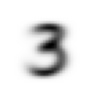

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

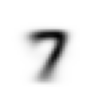

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

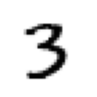

In [18]:
a_3 = stacked_threes[1]
show_image(a_3)

In [19]:
dist_3_l1 = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_l1, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [20]:
dist_7_l1 = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_l1, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [21]:
F.l1_loss(a_3, mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

The magic trick is that PyTorch, when it tries to perform a simple subtraction operation between two tensors of different ranks, will use broadcasting. That is, it will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. Broadcasting is an important capability that makes tensor code much easier to write.

## Stochastic Gradient Descent

In [22]:
?Tensor.requires_grad_

Docstring:
requires_grad_(requires_grad=True) -> Tensor

Change if autograd should record operations on this tensor: sets this tensor's
:attr:`requires_grad` attribute in-place. Returns this tensor.

:func:`requires_grad_`'s main use case is to tell autograd to begin recording
operations on a Tensor ``tensor``. If ``tensor`` has ``requires_grad=False``
(because it was obtained through a DataLoader, or required preprocessing or
initialization), ``tensor.requires_grad_()`` makes it so that autograd will
begin to record operations on ``tensor``.

Args:
    requires_grad (bool): If autograd should record operations on this tensor.
        Default: ``True``.

Example::

    >>> # Let's say we want to preprocess some saved weights and use
    >>> # the result as new weights.
    >>> saved_weights = [0.1, 0.2, 0.3, 0.25]
    >>> loaded_weights = torch.tensor(saved_weights)
    >>> weights = preprocess(loaded_weights)  # some function
    >>> weights
    tensor([-0.5503,  0.4926, -2.1158, -0.8

In [23]:
xt = tensor(3.).requires_grad_()

In [24]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(9., grad_fn=<SumBackward0>)

In [25]:
yt.backward()
xt.grad

tensor(6.)

## End-to-end SGD Example

In [26]:
time = torch.arange(0, 20).float()
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

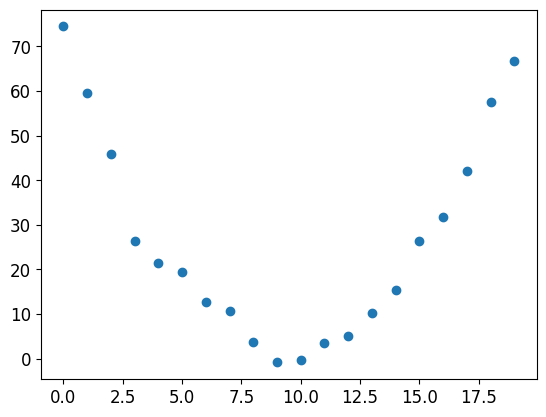

In [27]:
speed = torch.randn(20) * 3 + 0.75 * (time - 9.5)**2 + 1
plt.scatter(time, speed)

In [28]:
def f(t, params):
    a, b, c = params
    return a * (t ** 2) + (b * t) + c

In [29]:
def mse(preds, targets):
    return ((preds - targets) ** 2).mean()

### Step 1: init params

In [30]:
params = torch.randn(3).requires_grad_()

In [31]:
orig_params = params.clone()

### Step 2:Calculate predictions

In [32]:
preds = f(time, params)
preds

tensor([ 1.3525e+00, -1.6391e-01, -3.2121e+00, -7.7919e+00, -1.3903e+01, -2.1547e+01, -3.0721e+01, -4.1428e+01, -5.3666e+01, -6.7436e+01, -8.2738e+01, -9.9571e+01, -1.1794e+02, -1.3783e+02,
        -1.5926e+02, -1.8222e+02, -2.0671e+02, -2.3274e+02, -2.6029e+02, -2.8938e+02], grad_fn=<AddBackward0>)

In [33]:
def show_preds(preds, ax=None):
    if ax is None:
        ax = plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300, 100)

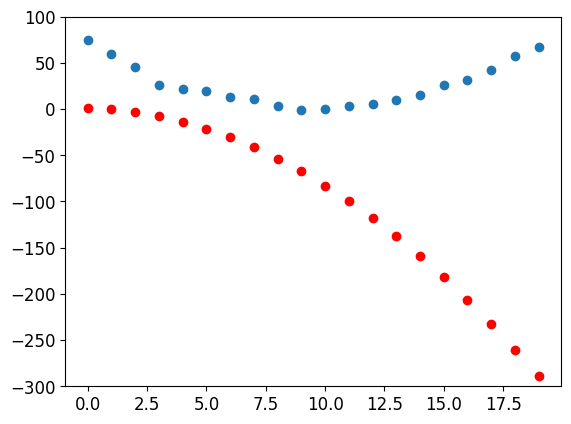

In [34]:
show_preds(preds)

### Step 3: Calculate Loss

In [35]:
loss = mse(preds, speed)
loss

tensor(25823.8086, grad_fn=<MeanBackward0>)

### Step 4: Calculate the grads

In [36]:
loss.backward()

In [37]:
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [38]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

### Step 5: Step the weights

In [39]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

> Understanding this bit depends on remembering recent history. To calculate the gradients we call backward on the loss. But this loss was itself calculated by mse, which in turn took preds as an input, which was calculated using f taking as an input params, which was the object on which we originally called requires_grad_—which is the original call that now allows us to call backward on loss. This chain of function calls represents the mathematical composition of functions, which enables PyTorch to use calculus's chain rule under the hood to calculate these gradients.

In [40]:
preds = f(time, params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

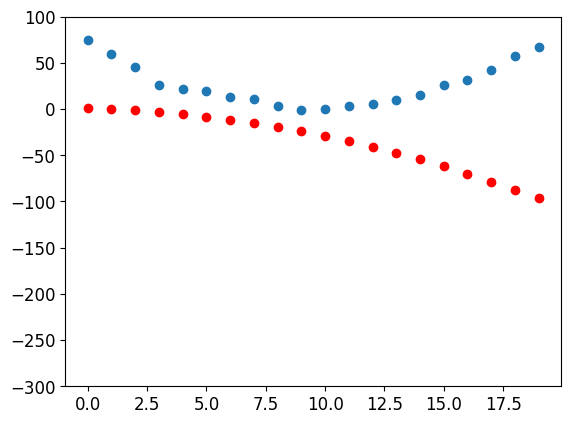

In [41]:
show_preds(preds)

In [42]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

### Step 6: Repeat the Process

In [43]:
for i in range(10):
    apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


In [44]:
params = orig_params.detach().requires_grad_()

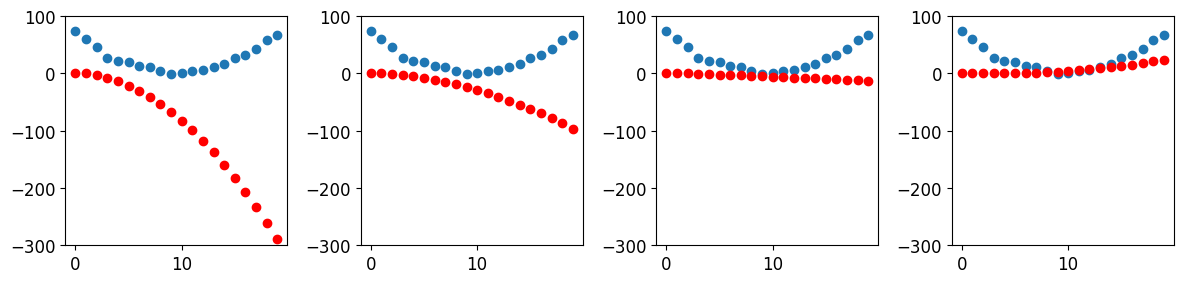

In [45]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

## MNIST 

In [46]:
# view(-1, n) means make this axis as large as possible to accommodate all values
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28 * 28)
stacked_threes.shape, stacked_sevens.shape, train_x.shape

(torch.Size([6131, 28, 28]),
 torch.Size([6265, 28, 28]),
 torch.Size([12396, 784]))

In [47]:
?torch.unsqueeze

Docstring:
unsqueeze(input, dim) -> Tensor

Returns a new tensor with a dimension of size one inserted at the
specified position.

The returned tensor shares the same underlying data with this tensor.

A :attr:`dim` value within the range ``[-input.dim() - 1, input.dim() + 1)``
can be used. Negative :attr:`dim` will correspond to :meth:`unsqueeze`
applied at :attr:`dim` = ``dim + input.dim() + 1``.

Args:
    input (Tensor): the input tensor.
    dim (int): the index at which to insert the singleton dimension

Example::

    >>> x = torch.tensor([1, 2, 3, 4])
    >>> torch.unsqueeze(x, 0)
    tensor([[ 1,  2,  3,  4]])
    >>> torch.unsqueeze(x, 1)
    tensor([[ 1],
            [ 2],
            [ 3],
            [ 4]])
Type:      builtin_function_or_method

In [48]:
train_y = tensor([1] * len(threes) + [0] * len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [49]:
dataset = list(zip(train_x, train_y))
x, y = dataset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [50]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])

valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = valid_7_tens.float() / 255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [51]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28 * 28)
valid_y = tensor([1] * len(valid_3_tens) + [0] * len(valid_7_tens)).unsqueeze(1)
valid_dataset = list(zip(valid_x, valid_y))

In [52]:
def init_params(size, std=1.0):
    return (torch.randn(size) * std).requires_grad_()

In [53]:
weights = init_params((28 * 28, 1))
weights.shape

torch.Size([784, 1])

In [54]:
bias = init_params(1)

In [55]:
(train_x[0] * weights.T).sum() + bias

tensor([20.2336], grad_fn=<AddBackward0>)

In [56]:
def linear1(xb): return xb @ weights + bias

In [57]:
preds = linear1(train_x)
preds

tensor([[20.2336],
        [17.0644],
        [15.2384],
        ...,
        [18.3804],
        [23.8567],
        [28.6816]], grad_fn=<AddBackward0>)

In [58]:
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True],
        [ True],
        [ True],
        ...,
        [False],
        [False],
        [False]])

In [59]:
corrects.float().mean().item()

0.4912068545818329

In [60]:
# ask torch not to calculate gradients as we do this
with torch.no_grad(): weights[0] *= 1.0001

In [61]:
preds = linear1(train_x)
((preds > 0.0).float() == train_y).float().mean().item()

0.4912068545818329

In [62]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets == 1, 1 - predictions, predictions).mean()

### Mini-batches

In [63]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

In [64]:
?L

Init signature: L(items=None, *rest, use_list=False, match=None)
Docstring:      Behaves like a list of `items` but can also index with list of indices or masks
File:           ~/venvs/ml/lib/python3.11/site-packages/fastcore/foundation.py
Type:           _L_Meta
Subclasses:     TfmdLists, MultiCategory, LabeledBBox

In [65]:
ds = L(enumerate(string.ascii_uppercase))
ds

(#26) [(0, 'A'),(1, 'B'),(2, 'C'),(3, 'D'),(4, 'E'),(5, 'F'),(6, 'G'),(7, 'H'),(8, 'I'),(9, 'J'),(10, 'K'),(11, 'L'),(12, 'M'),(13, 'N'),(14, 'O'),(15, 'P'),(16, 'Q'),(17, 'R'),(18, 'S'),(19, 'T')...]

In [66]:
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('R', 'S', 'K', 'W', 'I', 'O')),
 (tensor([20, 15,  9, 13, 21, 12]), ('U', 'P', 'J', 'N', 'V', 'M')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('H', 'Z', 'G', 'F', 'L', 'X')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('B', 'D', 'A', 'Y', 'T', 'Q')),
 (tensor([2, 4]), ('C', 'E'))]

### Putting All Together

In [67]:
weights = init_params((28 * 28, 1))
bias = init_params(1)

In [68]:
dl = DataLoader(dataset, batch_size=256)
xb, yb = first(dl)
xb.shape, yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [69]:
valid_dl = DataLoader(valid_dataset, batch_size=256)

In [70]:
# create a mini batch for testing 
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [71]:
preds = linear1(batch)
preds

tensor([[-2.1876],
        [-8.3973],
        [ 2.5000],
        [-4.9473]], grad_fn=<AddBackward0>)

In [72]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.7419, grad_fn=<MeanBackward0>)

In [73]:
loss.backward()
weights.grad.shape, weights.grad.mean(), bias.grad

(torch.Size([784, 1]), tensor(-0.0061), tensor([-0.0420]))

In [74]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    weights.grad.zero_()
    bias.grad.zero_()
    loss.backward()

In [75]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(), bias.grad

(tensor(-0.0061), tensor([-0.0420]))

In [76]:
def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

In [77]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds > 0.5) == yb
    return correct.float().mean()

In [78]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.2500)

In [79]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [80]:
validate_epoch(linear1)

0.5264

In [81]:
lr = 1.
params = weights, bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.6663

In [82]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end = ' ')

0.8265 0.89 0.9183 0.9276 0.9398 0.9466 0.9505 0.9525 0.9559 0.9578 0.9598 0.9608 0.9613 0.9618 0.9633 0.9637 0.9647 0.9657 0.9672 0.9677 

### Optimizer

In [99]:
linear_model = nn.Linear(28 * 28, 1)

In [100]:
w, b = linear_model.parameters()
print(linear_model.parameters())
w.shape, b.shape

<generator object Module.parameters at 0x7f7f30425fc0>


(torch.Size([1, 784]), torch.Size([1]))

In [101]:
class BasicOptim:
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr

    def step(self, *args, **kwargs):
        for p in self.params:
            p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params:
            p.grad = None

In [102]:
optim = BasicOptim(linear_model.parameters(), lr)

In [103]:
def train_epoch(model):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        optim.step()
        optim.zero_grad()

In [104]:
validate_epoch(linear_model)

0.7423

In [105]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [106]:
train_model(linear_model, 20)

0.4932 0.7905 0.8594 0.917 0.937 0.9507 0.9565 0.9634 0.9658 0.9682 0.9707 0.9726 0.9736 0.9751 0.9761 0.9765 0.9775 0.978 0.978 0.9785 

In [107]:
# SGD from fastai is the same as BasicOptim
linear_model = nn.Linear(28 * 28, 1)
optim = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.771 0.8569 0.9175 0.9365 0.9492 0.957 0.9634 0.9658 0.9678 0.9702 0.9731 0.9741 0.9751 0.9761 0.9765 0.9775 0.978 0.978 0.979 

In [108]:
dls = DataLoaders(dl, valid_dl)

In [109]:
learn = Learner(dls, nn.Linear(28 * 28, 1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [110]:
learn.fit(10, lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636885,0.503431,0.495584,00:00
1,0.504784,0.204224,0.820903,00:00
2,0.186399,0.177152,0.840039,00:00
3,0.082328,0.105222,0.914132,00:00
4,0.043894,0.077203,0.934249,00:00
5,0.028838,0.062021,0.947007,00:00
6,0.022622,0.052503,0.954858,00:00
7,0.019842,0.046157,0.962218,00:00
8,0.018420,0.041703,0.965653,00:00
9,0.017562,0.038427,0.968106,00:00


### Add a Linearity

In [112]:
simple_net = nn.Sequential(
    nn.Linear(28 * 28, 30),
    nn.ReLU(),
    nn.Linear(30, 1)
)

In [113]:
learn = Learner(dls, simple_net, opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [114]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.303961,0.412172,0.504416,00:00
1,0.144412,0.218978,0.818449,00:00
2,0.080239,0.110960,0.918057,00:00
3,0.052897,0.075492,0.941609,00:00
4,0.040186,0.059242,0.958292,00:00
5,0.033672,0.050093,0.964181,00:00
6,0.029913,0.044328,0.966634,00:00
7,0.027462,0.040387,0.968597,00:00
8,0.025692,0.037519,0.969578,00:00
9,0.024320,0.035326,0.969578,00:00


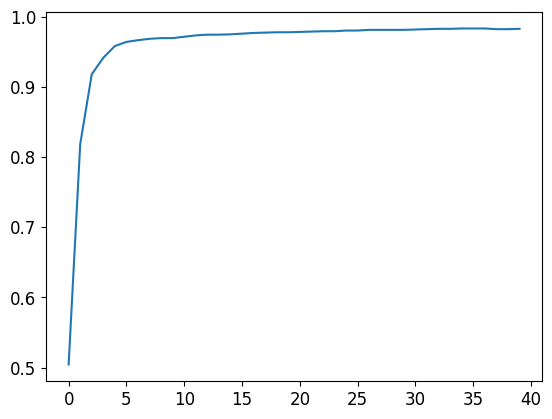

In [121]:
plt.plot(L(learn.recorder.values).itemgot(2))

### Going Deeper

In [125]:
dls = ImageDataLoaders.from_folder(path)
learn = vision_learner(dls, resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(1, 0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.069352,0.009068,0.997547,00:10
